In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow
import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from scipy import stats
import json

2023-05-01 03:51:02.464245: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import cactas as C

In [4]:
asymp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_no_norm.npy')
symp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_no_norm.npy')
asymp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_labels_no_norm.npy')
symp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_labels_no_norm.npy')

In [5]:
labels = np.concatenate((asymp_label, symp_label))
images = np.concatenate((asymp_img, symp_img))

In [7]:
train_f1 = []
test_f1 = []
for i in range(10):
    X, y = shuffle(images, labels, random_state=0)
    X_train, X_val, y_train, y_val = C.Util.split_3(X, y, val_size=0.15)

    #X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    #X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])
    
    X_train_raveled = np.concatenate((X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]), y_train.reshape(y_train.shape[0], y_train.shape[1]*y_train.shape[2])), axis=1)
    X_val_raveled = np.concatenate((X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]), y_val.reshape(y_val.shape[0], y_val.shape[1]*y_val.shape[2])), axis=1)
    y_train_raveled = y_train.reshape(y_train.shape[0], y_train.shape[1]*y_train.shape[2])
    y_val_raveled = y_val.reshape(y_val.shape[0], y_val.shape[1]*y_val.shape[2])


    
    rf = RandomForestClassifier(n_estimators=100)
    fitted = rf.fit(X_train_raveled, y_train_raveled)
    y_pred = rf.predict(X_val_raveled)
    
    
    f1 = sklearn.metrics.f1_score(y_val_raveled, y_pred, average='micro')
    train_f1.append(f1)
    print('run', i, 'acc', sklearn.metrics.accuracy_score(y_val_raveled, y_pred), 'f1', f1)
    
    asymp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped.npy')
    symp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped.npy')
    asymp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_labels_cropped.npy')
    symp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_labels_cropped.npy')

    labels_test = np.concatenate((asymp_label_test, symp_label_test))
    images_test = np.concatenate((asymp_img_test, symp_img_test))
    
    X_test, y_test = shuffle(images_test, labels_test, random_state=0)
    
    #X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
    X_test_raveled = np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]), y_test.reshape(y_test.shape[0], y_test.shape[1]*y_test.shape[2])), axis=1)
    y_test_raveled = y_test.reshape(y_test.shape[0], y_test.shape[1]*y_test.shape[2])
    
    y_pred = rf.predict(X_test_raveled)
    
    test_acc = sklearn.metrics.accuracy_score(y_test_raveled, y_pred)
    c_test_f1 = sklearn.metrics.f1_score(y_test_raveled, y_pred, average='micro')
    print('test run', i, 'acc', test_acc, 'f1', c_test_f1)
    
    test_f1.append(c_test_f1)

run 0 acc 0.11822660098522167 f1 0.6732673267326733
test run 0 acc 0.09668313338038109 f1 0.7392358608034602
run 1 acc 0.11330049261083744 f1 0.6762158560959362
test run 1 acc 0.08821453775582216 f1 0.7404651567565214
run 2 acc 0.11330049261083744 f1 0.6707114361702128
test run 2 acc 0.09103740296400847 f1 0.7413127413127413
run 3 acc 0.11330049261083744 f1 0.6743161220587014
test run 3 acc 0.0839802399435427 f1 0.7422586024611159
run 4 acc 0.12807881773399016 f1 0.677132652213639
test run 4 acc 0.10374029640084687 f1 0.7413045614878073
run 5 acc 0.12807881773399016 f1 0.6738750727771771
test run 5 acc 0.09244883556810163 f1 0.7402802425720476
run 6 acc 0.12807881773399016 f1 0.6749812920927912
test run 6 acc 0.07621736062103035 f1 0.7436874183717893
run 7 acc 0.12315270935960591 f1 0.673671920607122
test run 7 acc 0.10021171489061398 f1 0.745625373377505
run 8 acc 0.12315270935960591 f1 0.673421926910299
test run 8 acc 0.08962597035991532 f1 0.7435246097396818
run 9 acc 0.108374384236

In [5]:
train_f1 = [0.6732673267326733, 0.6762158560959362,0.6707114361702128,0.6743161220587014,0.677132652213639,
           0.6738750727771771, 0.6749812920927912, 0.673671920607122, 0.673421926910299, 0.6696160267111853]
test_f1 = [0.7392358608034602,0.7404651567565214, 0.7413127413127413, 0.7422586024611159,0.7413045614878073,
          0.7402802425720476, 0.7436874183717893, 0.745625373377505, 0.7435246097396818, 0.7426614481409002]

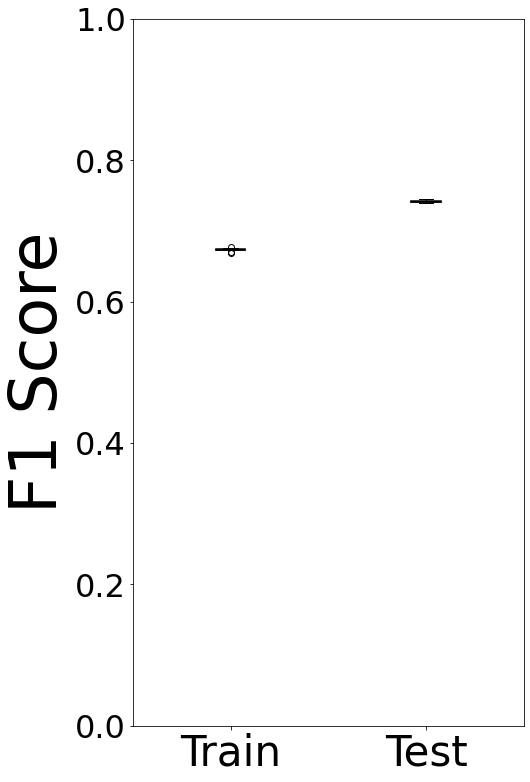

Train 0.6737209632369737 +/- 0.0021455972520031917
Test 0.742035601502357 +/- 0.0018087729561985471
t_20 = -73.03 ,p= 0.0


In [6]:
data = [train_f1, test_f1]
labels = ['Train', 'Test']
C.Util.boxplot(data, labels, y_lim=1, y_label='F1 Score', outputdir='/home/jiehyun.kim001/CACTAS/_EXPERIMENTS/')